# Sentiment Analysis

The following will be an application of the `TextBlob` python library to generate sentiment scores for each blog entry in the dataset. Note that only `polarity scores` are included. Polarity scores determine whether a blog post scores positive or negative according to the TextBlob algorithm. Other functions such as `subjectivity` was not included in this analysis, but users are free to apply these methods for their own analysis.

In [9]:
import pandas as pd
from textblob import TextBlob

In [10]:
# Read original dataset into dataframe
df = pd.read_csv('blog_spot.csv', index_col=0)
df

,wanderingscribe,homelesschroniclesintampa,livinghomelessourwritetospeak,seattlehomeless,homevan,joe-anybody,thehomelessfinch
0,# Extracted from http://wanderingscribe.blogsp...,#IWSG - JANUARY 2019 - CHECK IN - A NEW ME??? ...,Another one\n,# Archived posts\n,HOME VAN NEWSLETTER 6/12/16\n,House Keys Not Handcuffs \n,The Homeless Finch Has Found Her Nest: Project...
1,In case you were wondering... the paperback of...,"Gee,\n",Its been some time since I actually have writt...,# Extracted from https://seattlehomeless.blogs...,HOME VAN NEWSLETTER 1/18/16\n,A (sticker) and a good idea\n,The Homeless Finch Makes It's First Rescue\n
2,"December probably isn't the time for it, but I...","this is a great question, and before I ever wr...",I am presently having a great meal as I write ...,"Ok, it's all relative. Seattle is hot at 80 d...",HOLIDAY ANGELS DISGUISED AS HOMELESS STRANGERS\n,- Portland 2018\n,The Start of Something New for The Homeless Fi...
3,Sometimes I give in to dreams — dream that on...,"play the viola. Then, I came down with essenti...","Back when I last posted, I was running a new b...","So tonight one of our local politicians, Seatt...",HOME VAN NEWSLETTER 11/15/15\n,- WRAP\n,"Jehane Lyle, Watercolor on paper, ""Cuppa"" - de..."
4,"In the meantime though, it's hard graft and sc...",neuro-muscular disorder (my mom was afflicted ...,I actually had myself a big slip and started u...,Here's what he saw: \n,HOME VAN NEWSLETTER 10/4/15\n,On 9/28/15 in Portland Oregon I filmed this in...,This week has been a complete blast. Getting ...
...,...,...,...,...,...,...,...
2358,I can’t imagine living in a tent. I can’t imag...,Hartline. As far as public transportation goes...,NaN,NaN,IT’S WORKING!!! Every Thursday we are finding...,NaN,NaN
2359,from the suburbs for an entry level job. I can...,"BART or the NY Subway, but it's ours. We'll ke...",NaN,NaN,City stop and fewer people living in Bo Diddle...,NaN,NaN
2360,without an end in sight.\n,***WARNING: THIS POST CONTAINS SOME PRETTY SAL...,NaN,NaN,"half of those living in Bo Diddley have moved,...",NaN,NaN
2361,"But, dang it. I can\n","Well,\n",NaN,NaN,one wants to live on the sidewalk in the middl...,NaN,NaN


## Standard text clean up and processing

In [11]:
df = df.applymap(lambda x : str(x).lower())

In [12]:
# Function to apply sentiment module
def get_polarity(text):
    """Get the text polarity score using TextBlob"""
    return TextBlob(text).sentiment.polarity

### get_polarity()
Applying `get_polarity()` yields a sentiment score for each blog entry. This is a coefficient with a range of `-1` to `1`, indicating how negative or positive an entry might be. A sentiment score equal to `zero` means the sentiment is `neutral`.

In [13]:
df1 = df.applymap(lambda text : get_polarity(text))
df1

,wanderingscribe,homelesschroniclesintampa,livinghomelessourwritetospeak,seattlehomeless,homevan,joe-anybody,thehomelessfinch
0,0.000000,0.202110,0.000000,0.0000,0.000000,0.0,0.000000
1,0.126591,0.000000,-0.125000,0.0000,0.000000,0.7,0.250000
2,-0.128472,0.800000,0.500000,0.3125,0.000000,0.0,0.136364
3,0.237128,-0.077778,0.022727,0.0000,0.000000,0.0,0.000000
4,-0.291667,0.000000,0.057407,0.0000,0.000000,0.0,-0.014423
...,...,...,...,...,...,...,...
2358,0.000000,0.200000,0.000000,0.0000,0.000000,0.0,0.000000
2359,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000
2360,0.000000,0.250000,0.000000,0.0000,0.416667,0.0,0.000000
2361,0.000000,0.000000,0.000000,0.0000,0.112121,0.0,0.000000


## Data visualization

The histogram below shows how the blog posts are normally distributed across the sentiment spectrum, with mean scores for each blog falling near `0` or a `neutral` sentiment.

In [14]:
# Import standard visualization library
import matplotlib.pyplot as plt

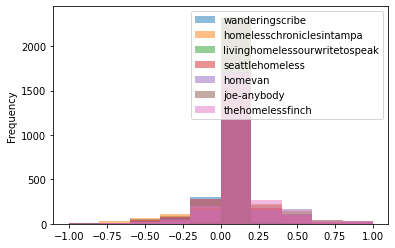

In [15]:
df1.plot.hist(alpha=0.5)

In [16]:
# Descriptive summary of sentiment polarity scores
df1.describe()

,wanderingscribe,homelesschroniclesintampa,livinghomelessourwritetospeak,seattlehomeless,homevan,joe-anybody,thehomelessfinch
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,0.050486,0.052295,0.008080,0.042578,0.067480,0.002645,0.070127
std,0.216771,0.259855,0.057511,0.206941,0.225238,0.036567,0.192350
min,-1.000000,-1.000000,-0.327778,-1.000000,-1.000000,-0.600000,-0.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.125000,0.125000,0.000000,0.097098,0.062500,0.000000,0.116667
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.700000,1.000000


The bar graph below plots the mean polarity scores for all of the blogs. From this we can see that the mean scores are relatively neutral in content, with a slight bias towards the positive end of the scale.

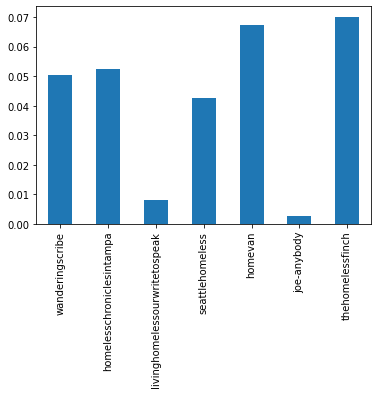

In [17]:
df1.mean().plot(kind='bar')

## Comparing frequency counts for positive and negative posts

First we will round off the polarity scores to two decimal places and then create a function that will convert the scores into categorical data in order to translate this into a frequency count. This is important because we are now more interested in the number of `positive` vs `negative` posts per blog.

In [18]:
# Round to two decimal places
df2 = df1.applymap(lambda x : float("{:.2f}".format(x))) # TODO - include in get_polarity()?

In [19]:
def post_sent(score):
    """Determine if a post is postive, neutral or negative"""
    if score < 0:
        return 'n'
    elif score == 0:
        return '-'
    elif score > 0:
        return 'p'

In [20]:
df3 = df2.applymap(lambda x : post_sent(x))
df3

,wanderingscribe,homelesschroniclesintampa,livinghomelessourwritetospeak,seattlehomeless,homevan,joe-anybody,thehomelessfinch
0,-,p,-,-,-,-,-
1,p,-,n,-,-,p,p
2,n,p,p,p,-,-,p
3,p,n,p,-,-,-,-
4,n,-,p,-,-,-,n
...,...,...,...,...,...,...,...
2358,-,p,-,-,-,-,-
2359,-,-,-,-,-,-,-
2360,-,p,-,-,p,-,-
2361,-,-,-,-,p,-,-


The next step is to create a function that will sum up the blog entries scored as either `p` or `n`. For our specific usecase, we are not interested in the neutral (`-`) posts, and so these will not be included in the dataframe.

In [21]:
# Create dataframe with only 'p' and 'n'
df4 = pd.DataFrame(index=['p', 'n'])

# Append value_counts() for 'p' and 'n' to df4
for name in df3.columns:
    df4[name] = pd.DataFrame(df3[name].value_counts()) # Error: test not defined unless previous line

df4

,wanderingscribe,homelesschroniclesintampa,livinghomelessourwritetospeak,seattlehomeless,homevan,joe-anybody,thehomelessfinch
p,907,746,92,797,667,56,820
n,449,393,10,410,270,20,266


Now it's easy to visually compare how many more `negative` vs `positive` posts a particular blog has. We can see that majority of posts from our sample of blogs are actually positive - contrary to what one might expect of the contents of a homeless blog!

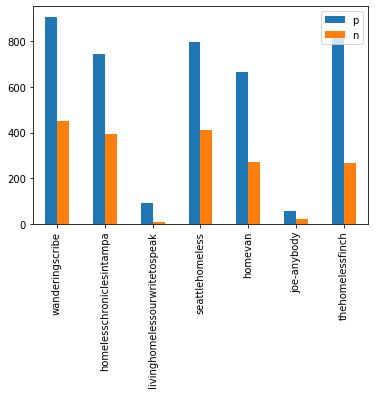

In [22]:
df4.T.plot(kind='bar')